# Phase #3 Data Mining - Classification & Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("cleaned_data.csv")

drop the ID column

In [3]:
x=list(df.keys())[1:]
df2=df[x]
print (df2)

      PetType       AgeMonths   Color  Size  WeightKg  Vaccinated  \
0           0  121-180 months  Orange     0  0.138783           1   
1           3   61-120 months   White     0  0.520009           0   
2           2  121-180 months  Orange     1  0.036514           0   
3           0   61-120 months   White     2  0.080105           0   
4           3  121-180 months    Gray     0  0.672244           0   
...       ...             ...     ...   ...       ...         ...   
2002        2   61-120 months  Orange     2  0.897969           1   
2003        3  121-180 months   Brown     2  0.127988           1   
2004        3   61-120 months  Orange     2  0.025551           1   
2005        2     7-12 months    Gray     0  0.688239           1   
2006        3  121-180 months   White     1  0.603973           1   

      HealthCondition TimeInShelterDays  AdoptionFee  PreviousOwner  \
0                   0        Short Stay     0.280561              0   
1                   0   Very 

# Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#split dataset in features and target variable
fn=df2.keys().tolist()[:-1]
X=df2[fn]
y=df2['AdoptionLikelihood']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
for col in X.select_dtypes('object').columns:
   X.loc[:,col]=encoder.fit_transform(X[col])

Partition:  20.0 Test - 80.0  Train

Gini Index:
Accuracy: 0.7786069651741293
Confusion Matrix:
 [[229  51]
 [ 38  84]]


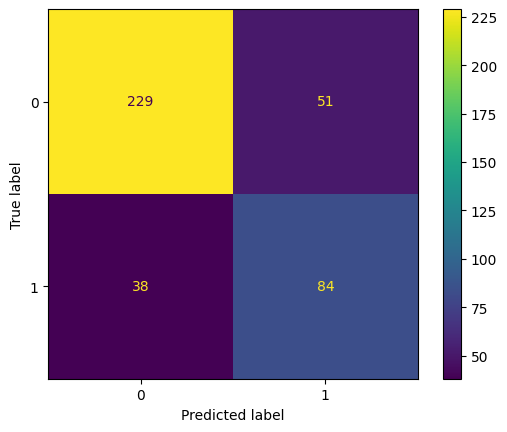

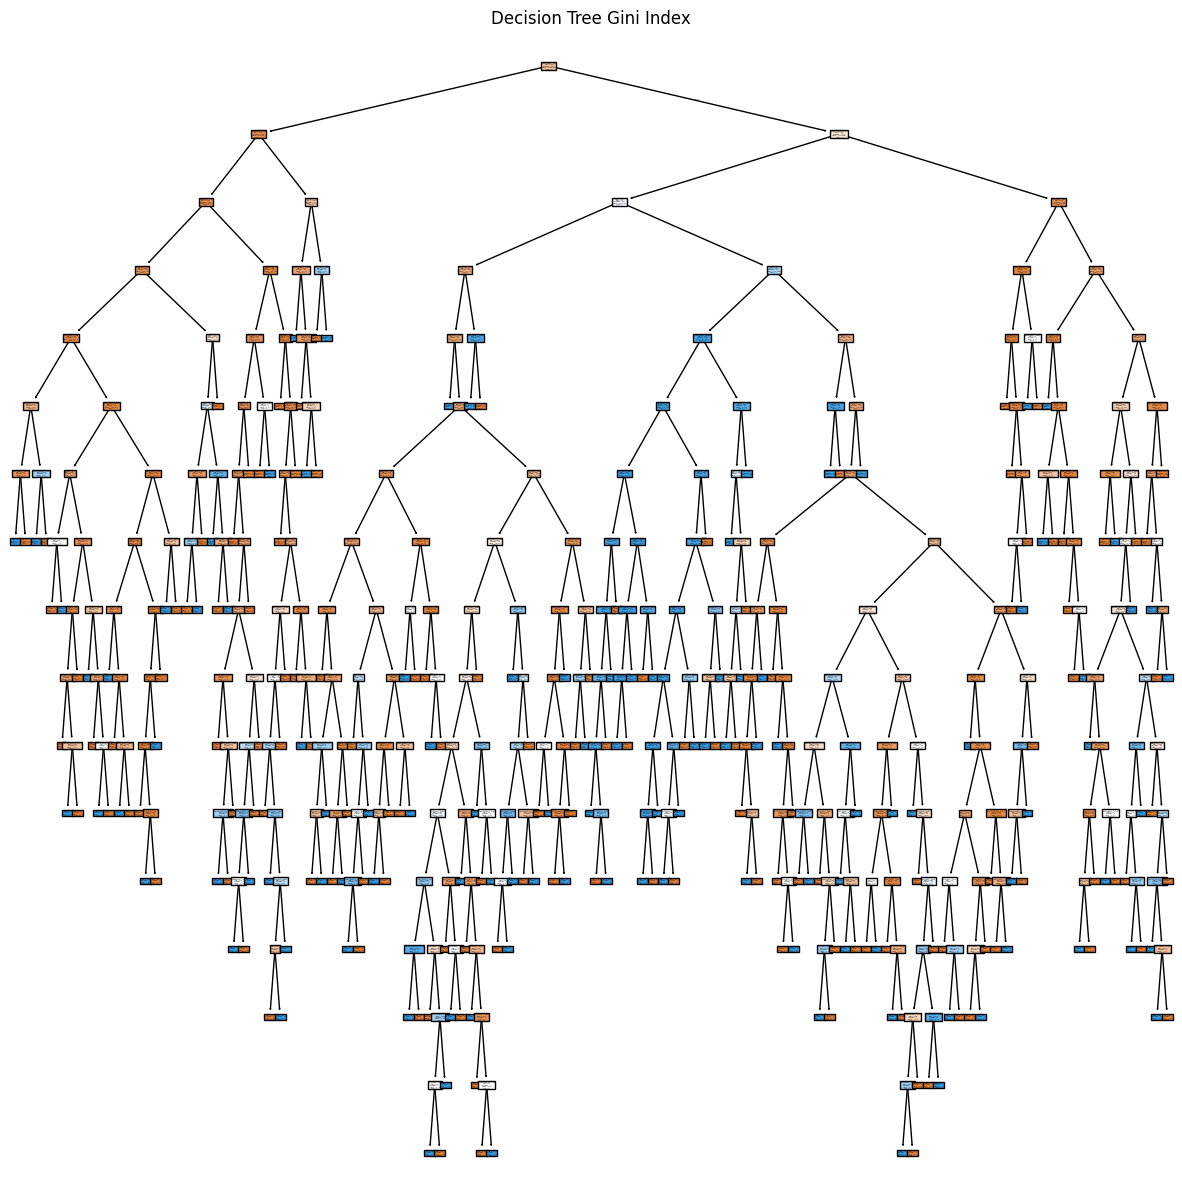


----------------------------------------------------------------------------------------------------

Entropy (Information Gain):
Accuracy:  0.7910447761194029
Confusion Matrix:
 [[232  48]
 [ 36  86]]


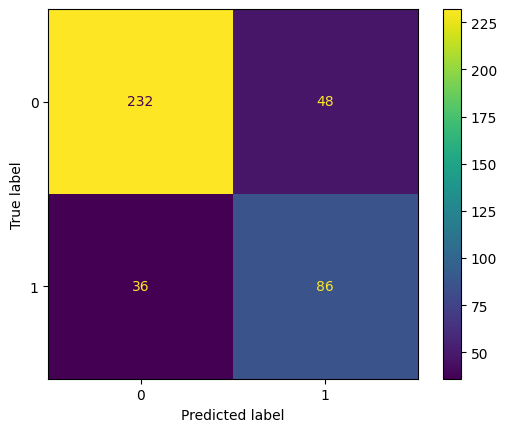

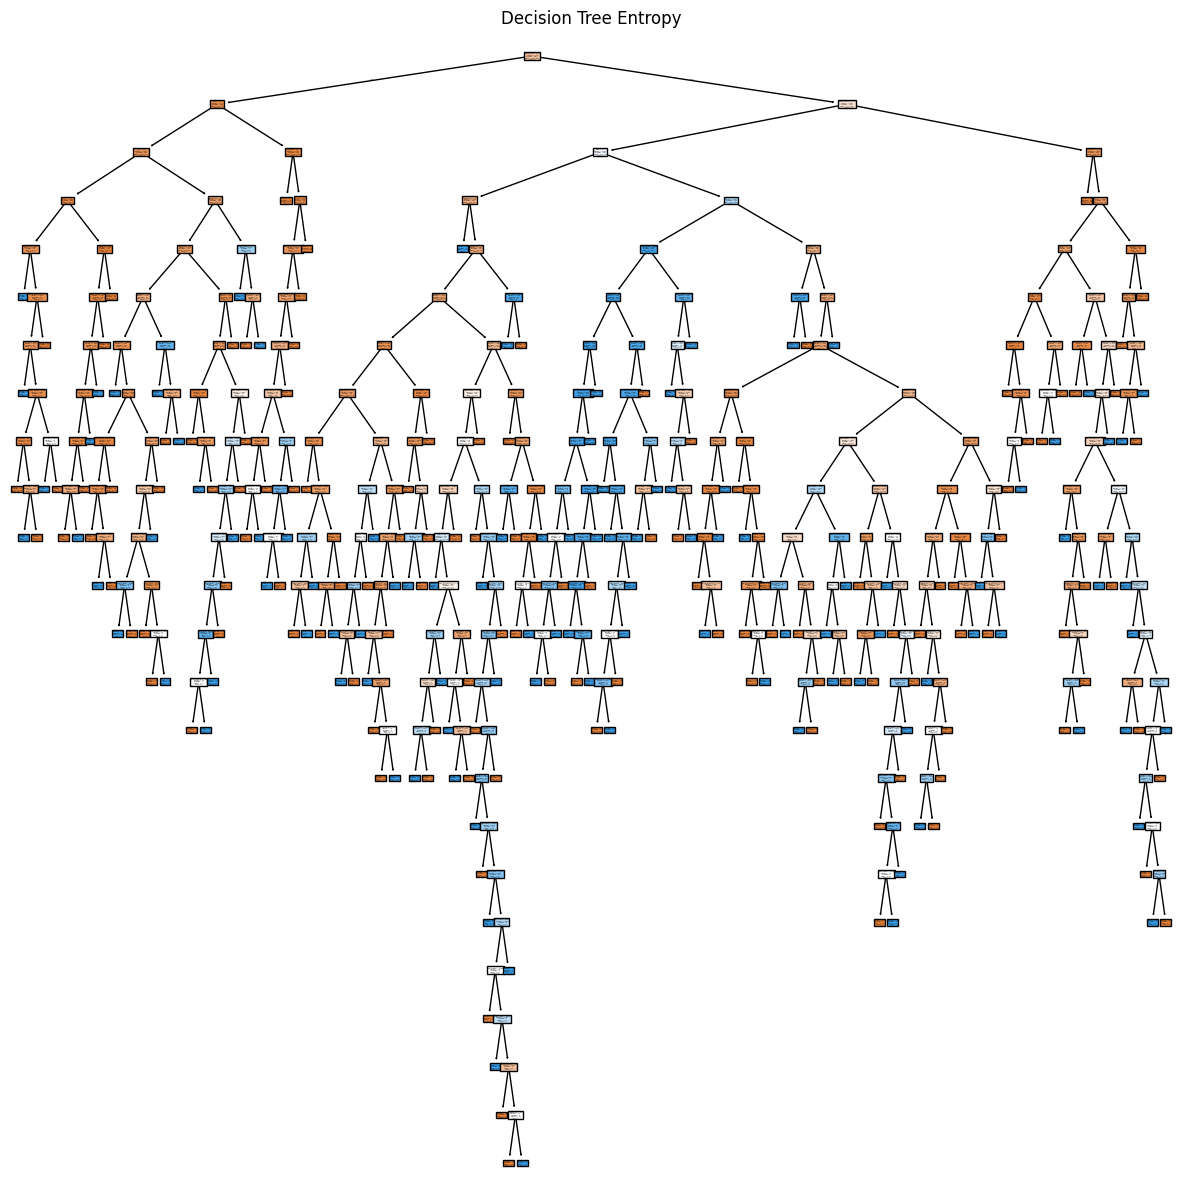



Partition:  30.0 Test - 70.0  Train

Gini Index:
Accuracy: 0.7976782752902156
Confusion Matrix:
 [[345  65]
 [ 57 136]]


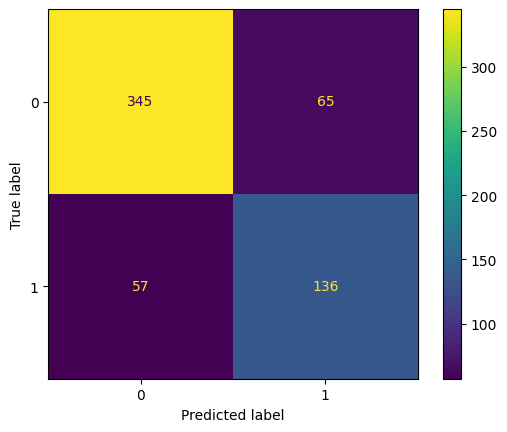

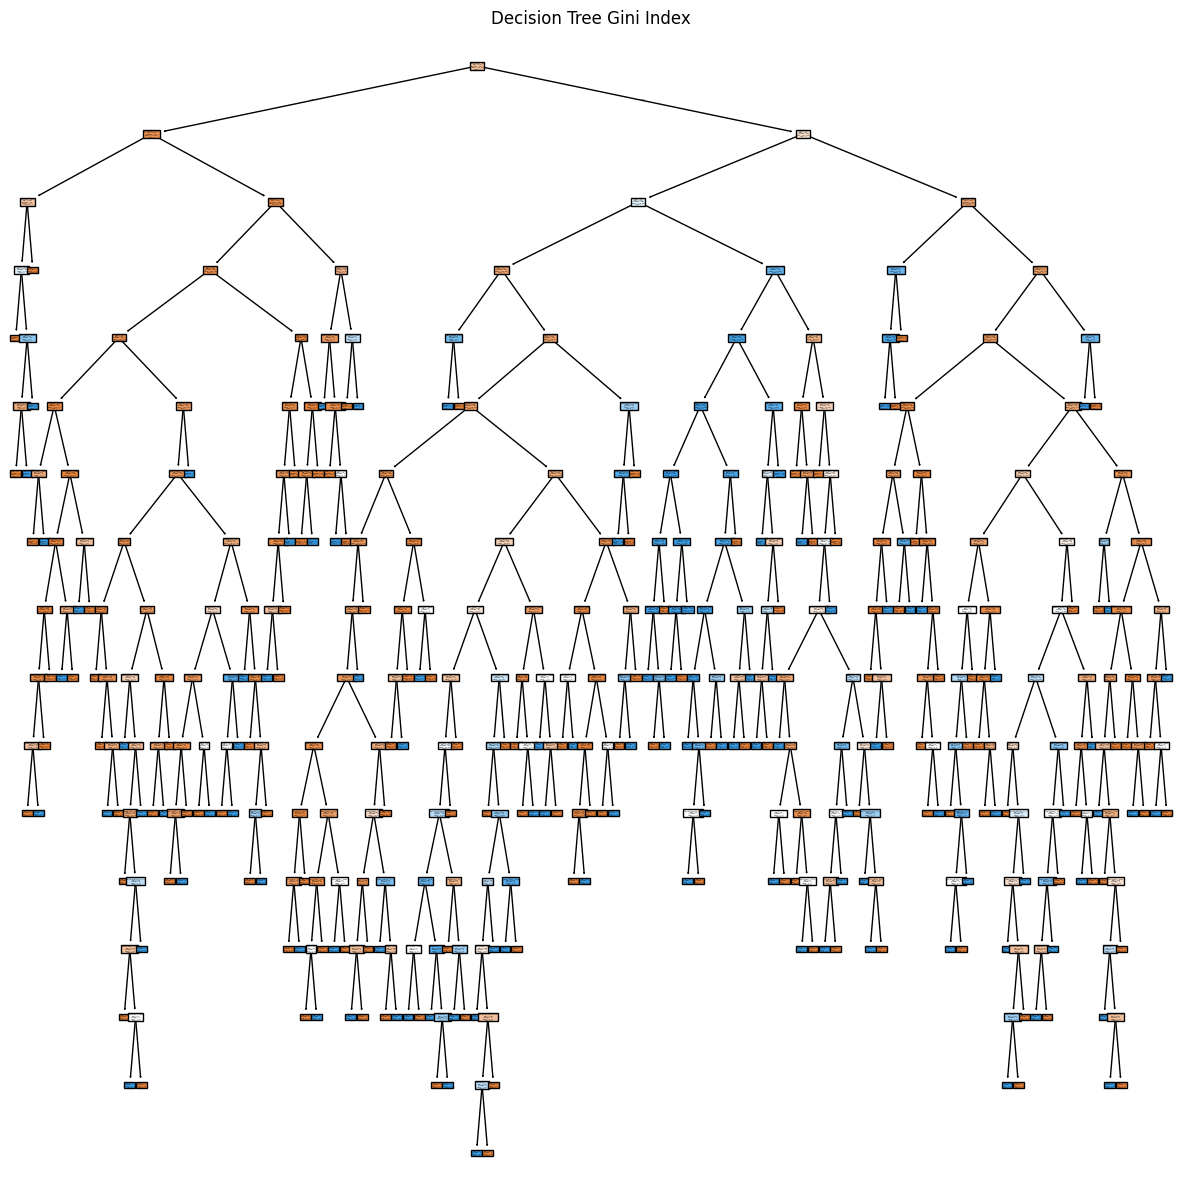


----------------------------------------------------------------------------------------------------

Entropy (Information Gain):
Accuracy:  0.8258706467661692
Confusion Matrix:
 [[357  53]
 [ 52 141]]


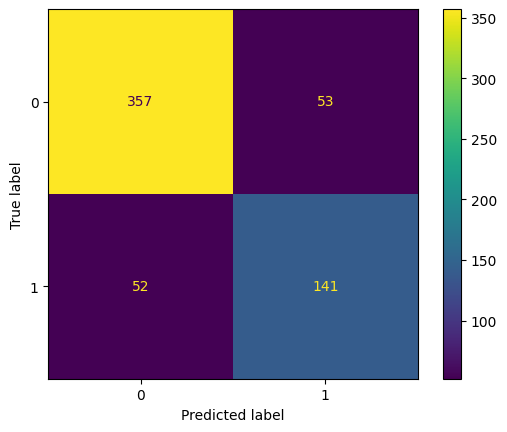

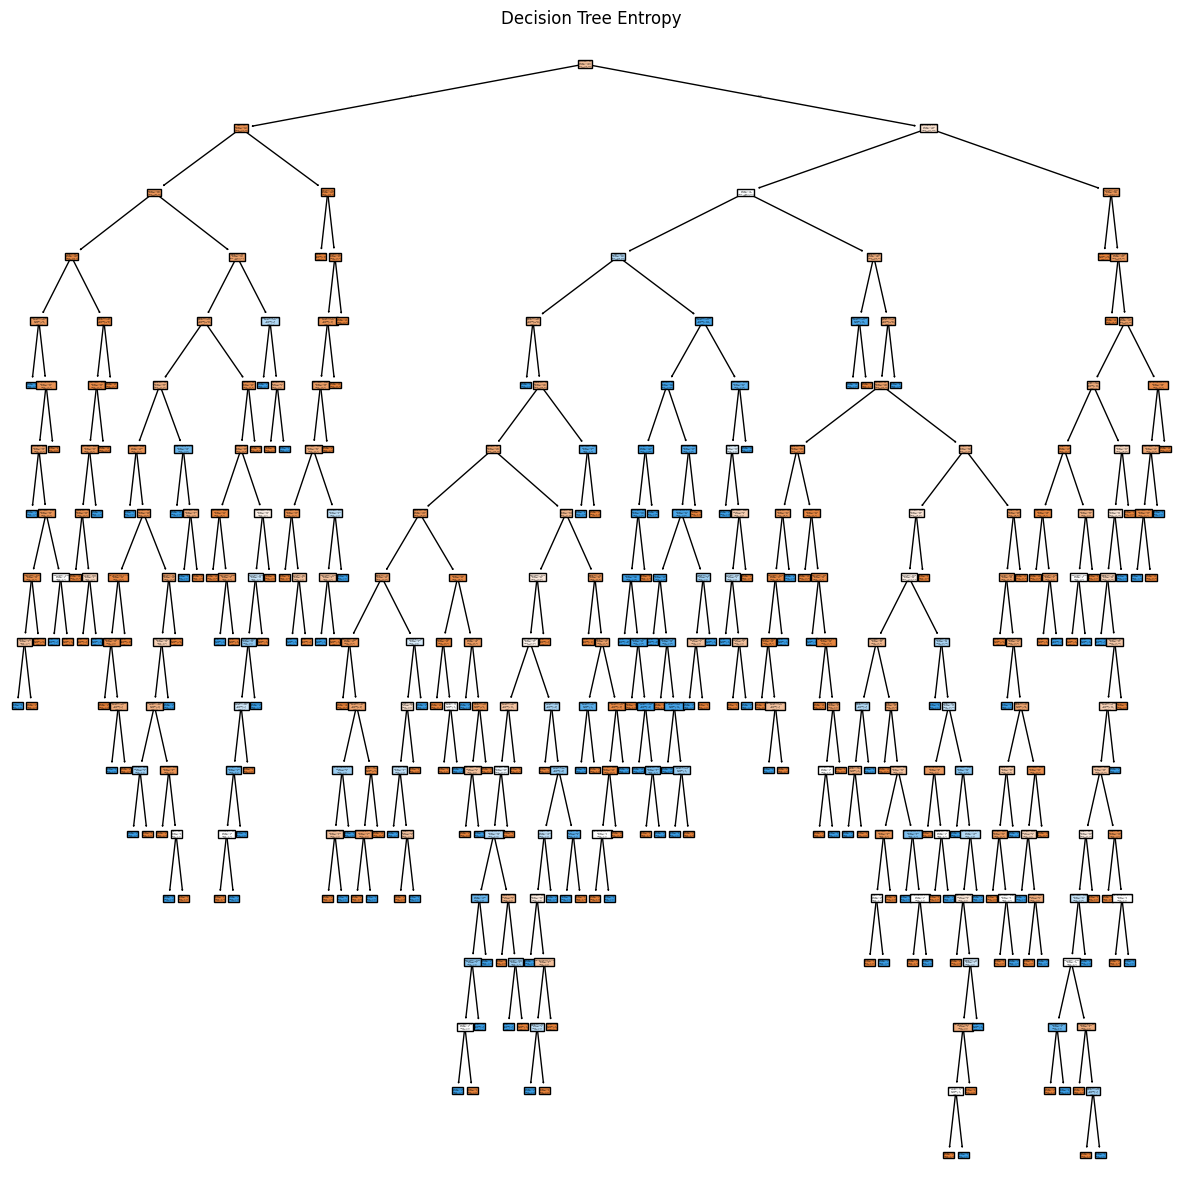



Partition:  40.0 Test - 60.0  Train

Gini Index:
Accuracy: 0.8144458281444583
Confusion Matrix:
 [[461  82]
 [ 67 193]]


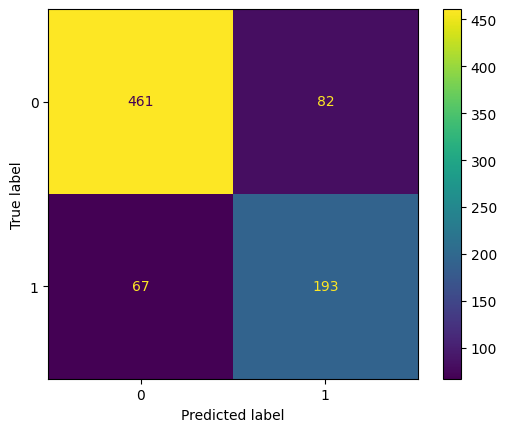

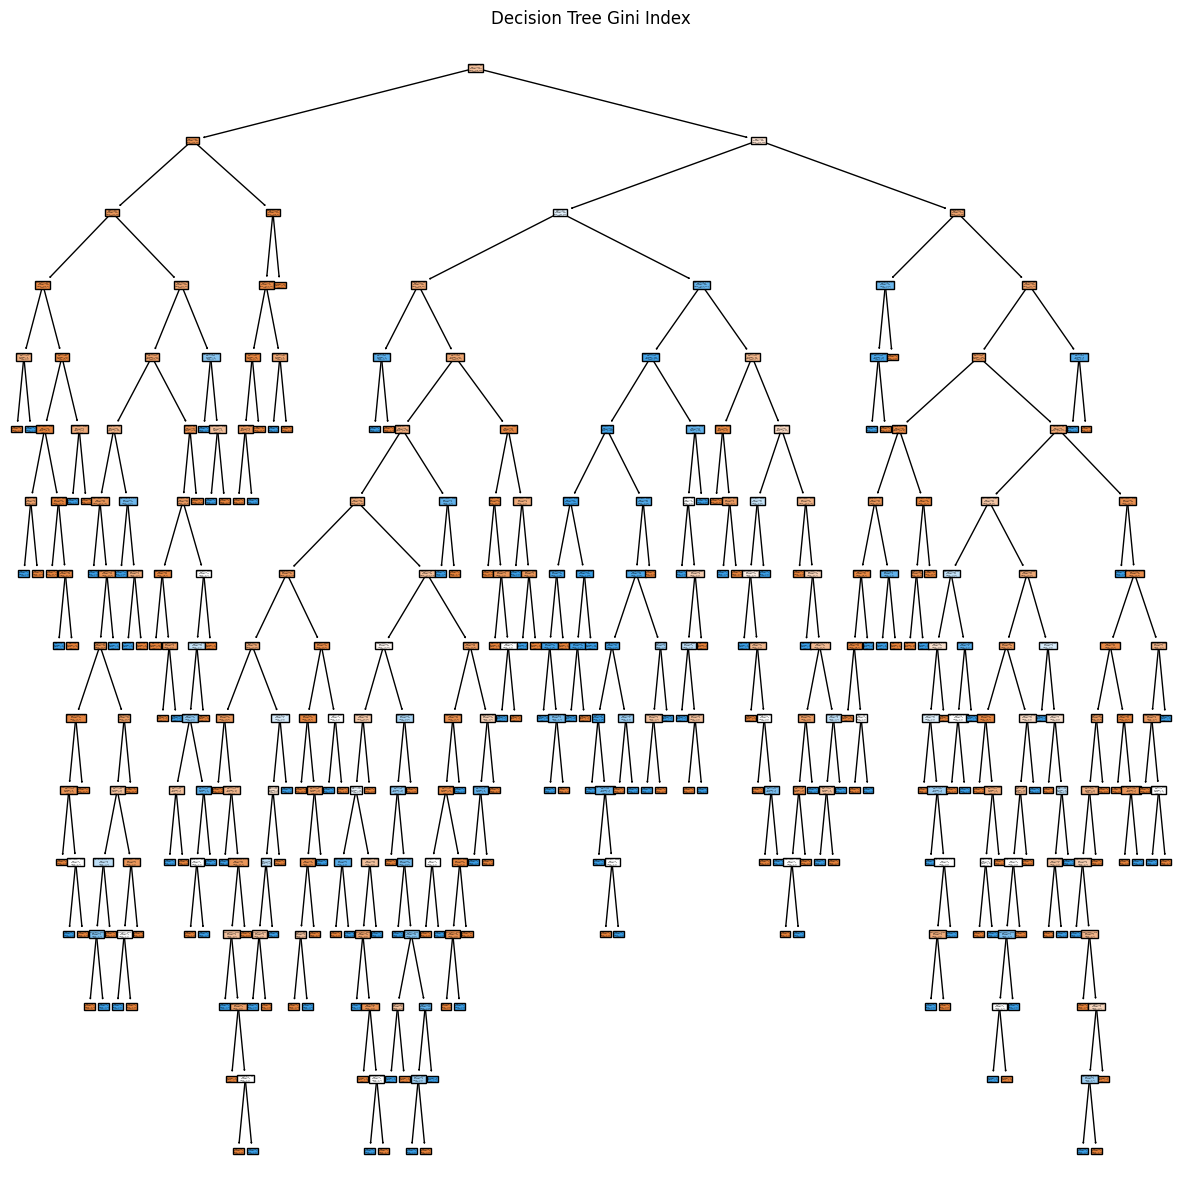


----------------------------------------------------------------------------------------------------

Entropy (Information Gain):
Accuracy:  0.8293897882938979
Confusion Matrix:
 [[470  73]
 [ 64 196]]


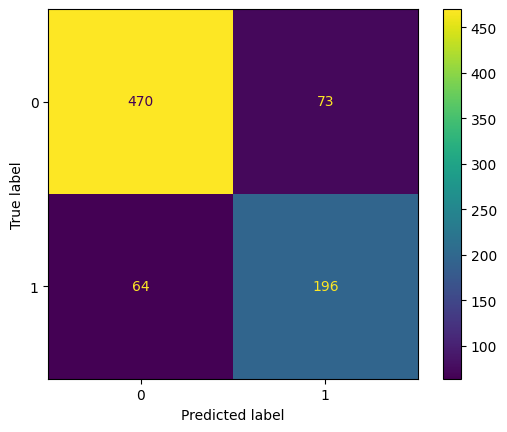

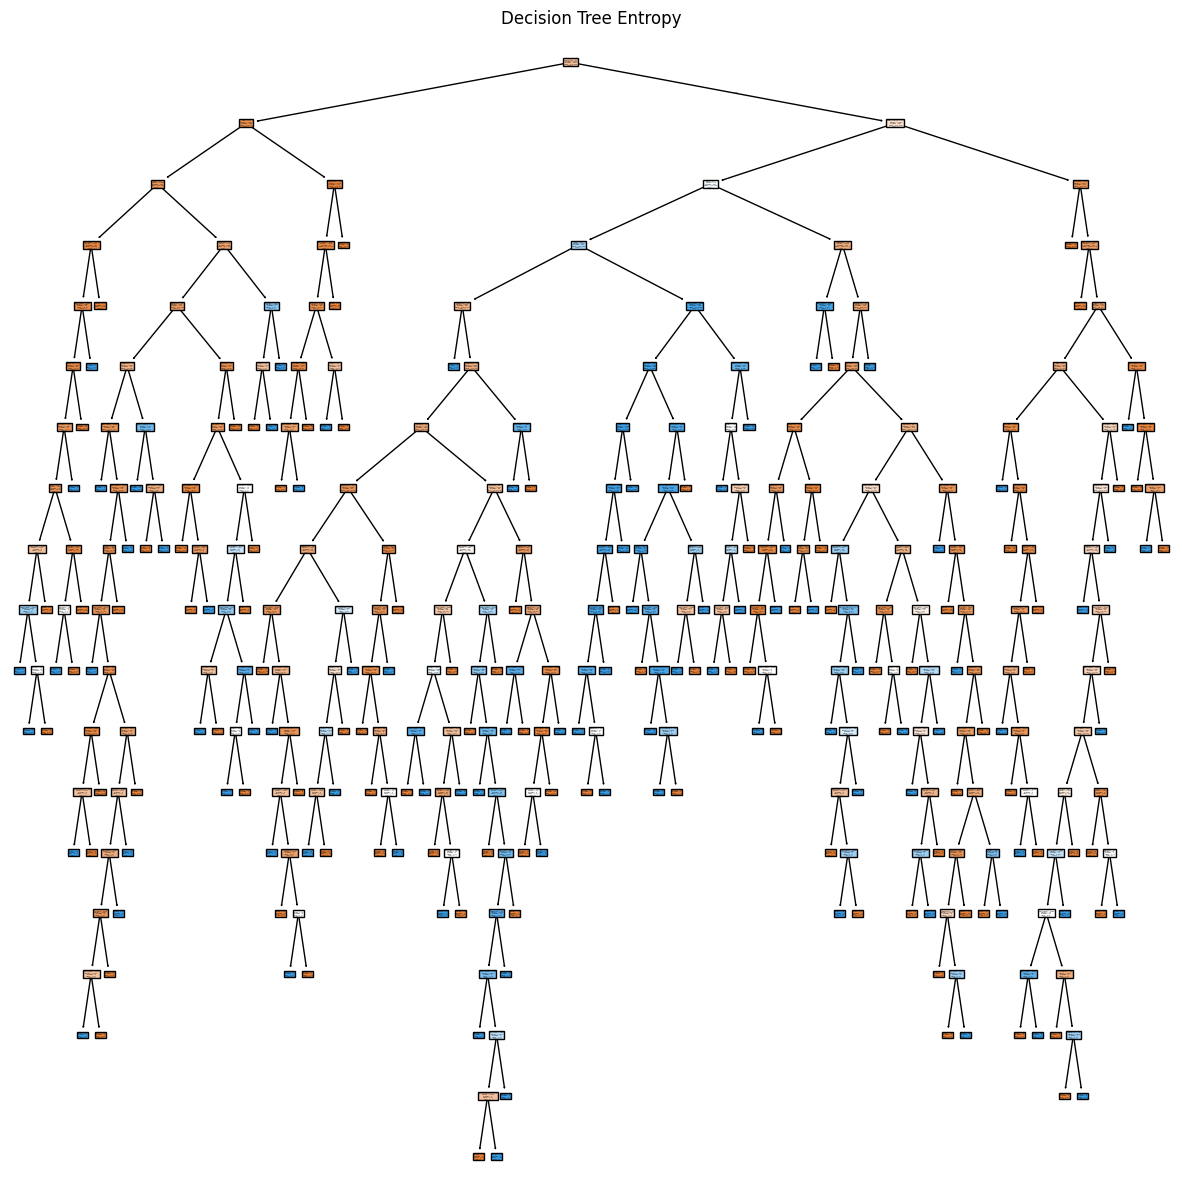

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define partition sizes for train-test splits
partition_sizes = [0.2, 0.3, 0.4]

# Loop through each partition size and evaluate Decision Tree classifiers
for partition in partition_sizes:
    # Split data for the current partition size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=partition, random_state=1)

    # Initialize classifiers with both Gini and Entropy criteria
    dt_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
    dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

    # Train and evaluate with Gini index
    clf=dt_gini.fit(X_train, y_train)
    y_pred_gini = dt_gini.predict(X_test)
    accuracy_gini = accuracy_score(y_test, y_pred_gini)
    cm_gini = confusion_matrix(y_test, y_pred_gini)


    print("Partition: " , partition * 100,"Test -",(1 - partition) * 100 , " Train\n")
    print("Gini Index:")
    print("Accuracy:",accuracy_gini)
    print("Confusion Matrix:\n", cm_gini)
    cn=df2['AdoptionLikelihood'].unique()
    disp=ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
    # Plot the decision tree
    plt.figure(figsize=(15, 15))
    class_names = df2['AdoptionLikelihood'].astype(str).unique()
    plot_tree(clf, filled=True, feature_names=fn, class_names=class_names)
    plt.title("Decision Tree Gini Index")
    plt.show()
    print("\n" + "-"*100 + "\n")

    # Train and evaluate with Entropy (Information Gain)
    clf=dt_entropy.fit(X_train, y_train)
    y_pred_entropy = dt_entropy.predict(X_test)
    accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
    cm_entropy = confusion_matrix(y_test, y_pred_entropy)
    print("Entropy (Information Gain):")
    print("Accuracy: ",accuracy_entropy)
    print("Confusion Matrix:\n", cm_entropy)
    cn=df2['AdoptionLikelihood'].unique()
    disp=ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
    # Plot the decision tree
    plt.figure(figsize=(15, 15))
    class_names = df2['AdoptionLikelihood'].astype(str).unique()
    plot_tree(clf, filled=True, feature_names=fn, class_names=class_names)
    plt.title("Decision Tree Entropy")
    plt.show()
    print("\n" + "="*200 + "\n")

# Comparison of Decision Tree Classifier Performance

We tested how well Decision Tree classifiers perform using two methods: Gini Index and Entropy . These tests were done with three different dataset splits: 20%, 30%, and 40% of the data for testing, while the rest was used for training.
 1. 20% Test - 80% Train

 • Gini Index Accuracy: 0.7786

 • Entropy Accuracy: 0.7910

 • Entropy performed slightly better than Gini in this split.

 2. 30% Test - 70% Train

 • Gini Index Accuracy: 0.7976

 • Entropy Accuracy: 0.8258

 • Entropy again showed higher accuracy than Gini.

 3. 40% Test - 60% Train

 • Gini Index Accuracy: 0.8144

 • Entropy Accuracy: 0.8293

 • With the largest test split, Entropy still performed better than Gini.


**Conclusion:**

These results suggest that for this specific dataset and experimental setup, Entropy showed better performance than Gini in all test cases, with the best results in the 40% Test - 60% Train split. This means that using Entropy as the criterion for Decision Tree classification is likely to give better accuracy with this type of data.

# Clustering (results with low silhouette score )

Using all features absolutely except "class Label"

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


**Scaled Dataframe**

In [26]:
features = df2.drop(columns=['AdoptionLikelihood'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pet_scaled = pd.DataFrame(scaled_features , columns=features.columns)
print("Scaled DataFrame:")
print(pet_scaled)

Scaled DataFrame:
       PetType  AgeMonths      Size  WeightKg  Vaccinated  HealthCondition  \
0    -1.362303  -1.084264 -1.266626 -1.281098    0.653023        -0.494232   
1     1.346556   1.030525 -1.266626  0.045756   -1.531339        -0.494232   
2     0.443603  -1.084264 -0.020490 -1.637043   -1.531339        -0.494232   
3    -1.362303   1.030525  1.225647 -1.485328   -1.531339        -0.494232   
4     1.346556  -1.084264 -1.266626  0.575608   -1.531339        -0.494232   
...        ...        ...       ...       ...         ...              ...   
2002  0.443603   1.030525  1.225647  1.361243    0.653023        -0.494232   
2003  1.346556  -1.084264  1.225647 -1.318671    0.653023         2.023341   
2004  1.346556   1.030525  1.225647 -1.675202    0.653023        -0.494232   
2005  0.443603   1.735454 -1.266626  0.631278    0.653023        -0.494232   
2006  1.346556  -1.084264 -0.020490  0.337992    0.653023        -0.494232   

      TimeInShelterDays  AdoptionFee  Previou

**Choosing the Number of Clusters K**


by evaluate the clustering results using both the Silhouette coefficient and the Elbow method.

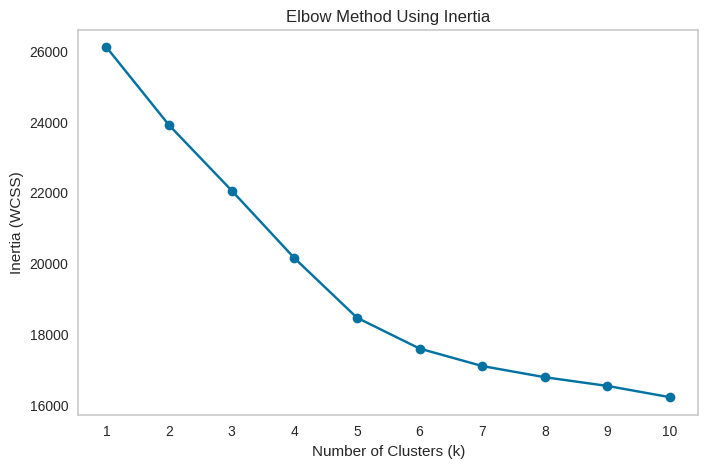

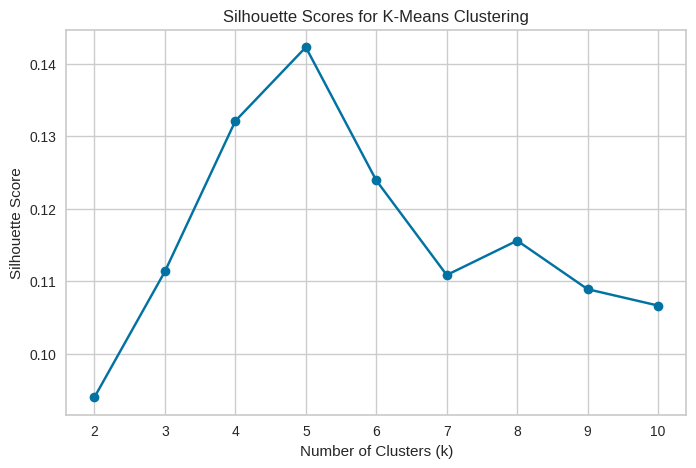

In [31]:
from sklearn.metrics import silhouette_score
inertia_values = []
k_range = range(1, 11)  # Test for k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # Use your normalized features
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title("Elbow Method Using Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(k_range)
plt.grid()
plt.show()



silhouette_scores = []
k_range = range(2, 11)  # Start from 2 clusters (k=1 is meaningless for silhouette)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


Discussion & comparison
1.  **Elbow Method (Inertia vs Number of Clusters):**

The Elbow method looks at the total within-cluster sum of squares (inertia) and helps identify the point where adding more clusters does not significantly improve the fit.

From the results:

K=3: Inertia approximately  22000

K=4: Inertia decreases to approximately 20000

K=5: Inertia further reduces to approximately 18000

The inertia steadily decreases as the number of clusters K increases. This is expected since increasing K reduces the distance between data points and their cluster centers.
The rate of decrease slows noticeably after  K=5. This suggests that adding more clusters beyond  K=5  does not significantly improve the compactness of the clusters.


2. **Silhouette Score vs Number of Clusters:**
The Silhouette coefficient measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

The silhouette score peaks at  K=5 , indicating that the clusters are best separated at this point.
- For  K=4  and  K=6 , the silhouette score is lower, showing less well-defined clusters. Beyond  K=5, the score decreases significantly, indicating that the additional clusters result in worse separation or overly fragmented clusters.


**Conclusion:**
1. **Optimal K **: Based on the silhouette score,  K=5 is the most suitable choice, as it provides the highest score, indicating well-defined and separated clusters.
2. **Support from the Elbow Method**:the inertia plot supports  K=5  as a reasonable point where the rate of inertia reduction begins to slow.

The combination of the Elbow method and the Silhouette coefficient suggests that
K=5 is the best choice. It balances the compactness (inertia) of the clusters with their separation(silhouette score), ensuring that the clusters are well-defined without unnecessary complexity.
 K=5  is the optimal number of clusters, balancing compactness (inertia) and separation (silhouette score).






**#Validation & evaluation of Clusters with Silhouette Score**

The average silhouette score is: 0.1422587390294616


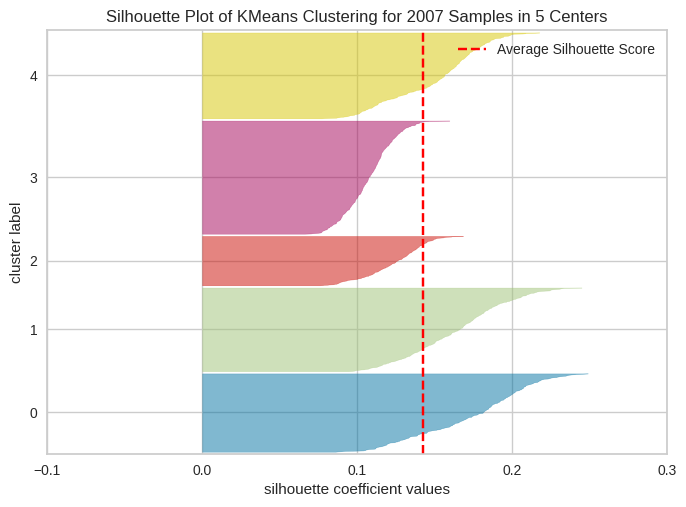

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2007 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
visualizer.fit(pet_scaled)
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()

A Silhouette Score output of 0.14 which is closer to 0 indicates suboptimal clustering performance. This score is low, suggesting that the clusters are not well-defined and that there is significant overlap between them, or that the clustering is not very strong.


The silhouette plot visually confirms that the clustering at
K=5 does not result in well-separated groups. The average silhouette score line (marked in red) is low, and there are many points close to or below this line, signifying poor assignment quality for these clusters.

Although the elbow method suggested that 5 clusters , the silhouette plot highlights that this choice does not necessarily lead to well-defined or meaningful clusters.

The visual results show that it's important to use different ways to check clustering results to make sure the chosen number of clusters actually fits the data well.

**Visualizing the Clusters:**

In [32]:
optimal_k = 5  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df2['Cluster'] = kmeans.fit_predict(scaled_features)
print(df2.groupby('Cluster').mean())

          PetType  AgeMonths      Size  WeightKg  Vaccinated  HealthCondition  \
Cluster                                                                         
0        1.540470   2.522193  1.036554  0.488611    0.738903         0.174935   
1        1.410758   2.557457  1.012225  0.523473    0.679707         0.215159   
2        1.549587   2.524793  1.033058  0.487624    0.000000         0.152893   
3        1.500904   2.576854  1.000000  0.514328    1.000000         0.197107   
4        1.561905   2.490476  1.014286  0.508587    0.697619         0.221429   

         TimeInShelterDays  AdoptionFee  PreviousOwner  AdoptionLikelihood  \
Cluster                                                                      
0                 1.086162     0.523104       0.308094            0.326371   
1                 1.095355     0.483309       0.273839            0.347188   
2                 1.074380     0.481111       0.334711            0.140496   
3                 1.132007     0.512261   

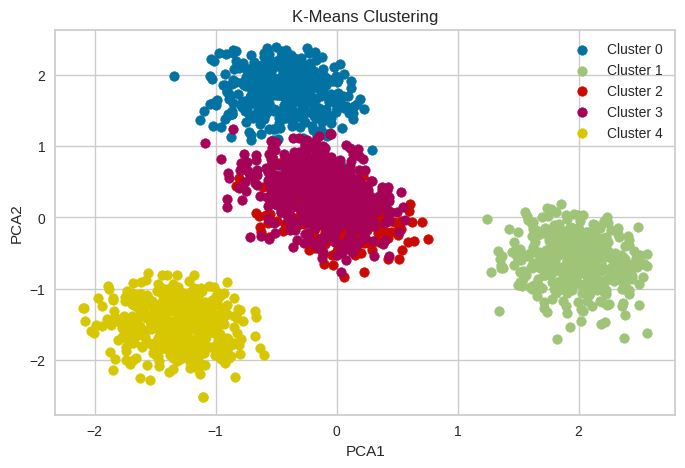

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
df2['PCA1'] = pca_features[:, 0]
df2['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    cluster_data = df2[df2['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title("K-Means Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


The plot shows five well-separated clusters (clusters 0 to 4) in the two-dimensional space "PCA", indicating that the K-means algorithm successfully identified distinct groupings within the data.

As we mentioned before in the silhouette score result that might be an overlapping, also from the plot above we can see that Clusters like Cluster 3 and Cluster 2 appear more densely packed, suggesting that data points in these clusters may have more similar feature values. In contrast, Cluster 1 appears somewhat more spread out, indicating a bit more variability within that group.
( or might be due to the dimensions ).

Cluster 0, Cluster 2, and Cluster 3 are relatively close to each other compared to Cluster 1 and Cluster 4, which are more isolated. This proximity could imply that the clusters close together share some characteristics, while the isolated clusters represent unique groups.

These clusters could represent distinct groups based on features like age, size, time in shelter, and other features.
The isolated cluster (Cluster 1) may represent a unique subset of pets that have distinct characteristics (such as larger or smaller values in a key feature), which separate them from the rest.

**In summary,** the K-means clustering has effectively grouped the data into distinct clusters with meaningful separations, and the visualization using PCA provides a clear view of these groupings. The relatively isolated clusters indicate unique data groups, while closely located clusters may share **overlapping characteristics.**

#  Clustering (using other features combination for better results)

Scaled features
Selecting the features for clustering and normalize them using StandardScaler

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
features = df2[['AgeMonths',  'WeightKg']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pet_scaled = pd.DataFrame(scaled_features , columns=features.columns)
print("Scaled DataFrame:")
print(pet_scaled)

Scaled DataFrame:
      AgeMonths  WeightKg
0     -1.084264 -1.281098
1      1.030525  0.045756
2     -1.084264 -1.637043
3      1.030525 -1.485328
4     -1.084264  0.575608
...         ...       ...
2002   1.030525  1.361243
2003  -1.084264 -1.318671
2004   1.030525 -1.675202
2005   1.735454  0.631278
2006  -1.084264  0.337992

[2007 rows x 2 columns]


**K-Means Clustering:**

Choosing the number of clusters (k).
Using the Elbow Method to identify the optimal number of clusters by plotting inertia for different **K** values

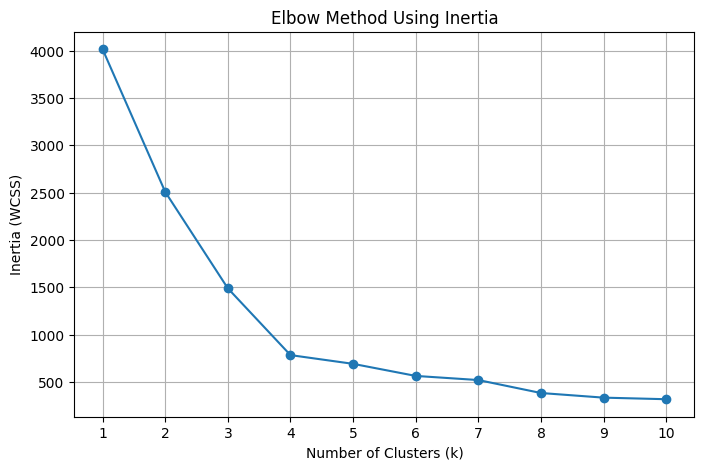

In [17]:
inertia_values = []
k_range = range(1, 11)  # Test for k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # Use your normalized features
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title("Elbow Method Using Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(k_range)
plt.grid()
plt.show()

comparing and discussing different K numbers

From the Elbow Method plot, we can observe that : As K increases from 1 to 10, the inertia decreases, indicating that the clusters are becoming more compact,since increasing K allows more centroids to reduce the sum of squared distances.

**k = 2 (First significant drop)**
Inertia drops significantly between k=1 and k=2, indicating that adding a second cluster provides a considerable improvement in clustering the data.

**k = 4 (Elbow point)**
The inertia begins to level off after k=4. we can considered this as the "elbow" point, where increasing k beyond 4 yields diminishing returns in terms of reducing inertia.

**k = 10 (Minimal Decrease in Inertia)**
Beyond k=4, the inertia decreases only slightly for larger values of k, as seen at k=10. This indicates that the additional clusters don’t improve the clustering much further.k=10, the clustering is overly fine-grained.Each cluster would likely have a small number of members,rather than truly meaningful groups.

**in conclusion** the optimal K number will be the elbow point which is **k = 4** .

**comparing and discussing the results of  different K numbers of clusters using Silhouette evaluation method  **

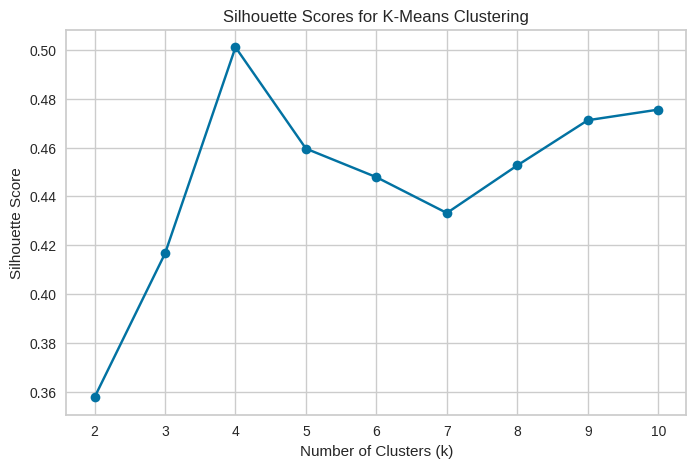

In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Start from 2 clusters (k=1 is meaningless for silhouette)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


**for K=2**

Silhouette Score: Approximately 0.36 (the lowest in the range).
A low silhouette score indicates that the clustering is poor,  because two clusters are insufficient to capture the natural structure of the data. Many data points are likely assigned to the wrong cluster, because 2 clusters may forces diverse data points into only two groups, oversimplifying the dataset.
It creates overly broad clusters, leading to low-quality groupings.


---


**for K=4 (the optimal k number):**

Silhouette Score: Approximately 0.51 (the highest value).
The best clustering performance in this range, indicating that clusters are well-separated and data points fit well within their groups. Data points within each cluster are relatively compact and distinct from those in other clusters.
**in Conclusion:**
k=4 is the optimal choice based on the silhouette score.


---


**for K=10:**

Silhouette Score: Approximately 0.46 (comparable to the scores for k=3 and k=5).
While the silhouette score suggests a reasonable clustering result, having ten clusters might introduce unnecessary complexity, clusters may be too fragmented, splitting naturally cohesive groups into smaller, less meaningful sub-groups.


**Validation & evaluation of optimal k number of clusters with Silhouette Score**

The average silhouette score is: 0.5010760695393801


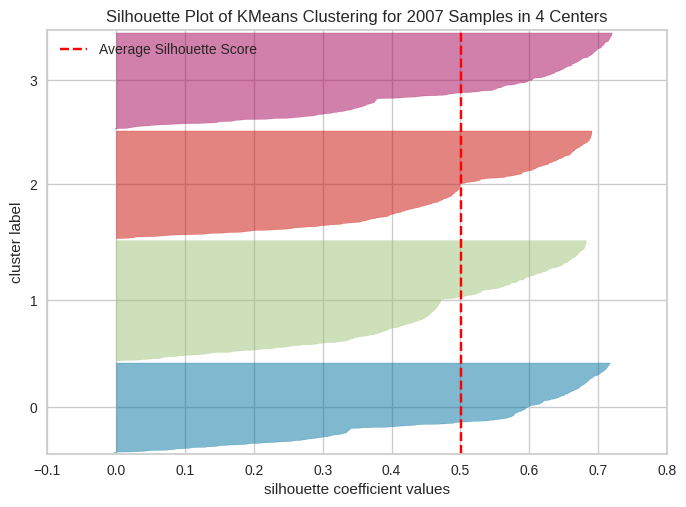

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2007 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
visualizer.fit(pet_scaled)
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()



At 0.5 (the highest silhouette score of k values),

 indicating the best balance between compactness and separation of clusters.
the clustering is:

Fairly compact: Points within the clusters are moderately close to each other.

Reasonably separated: Clusters are distinct but not entirely isolated, meaning some overlap might still occur.

A score of 0.5 suggests moderately well-defined clusters and distinct,
Clusters are distinguishable but not perfectly separated — pets of similar ages and weights could share overlapping characteristics.



The optimaal value of k is likely a good fit for the data.

**Visualizing the Clusters:**

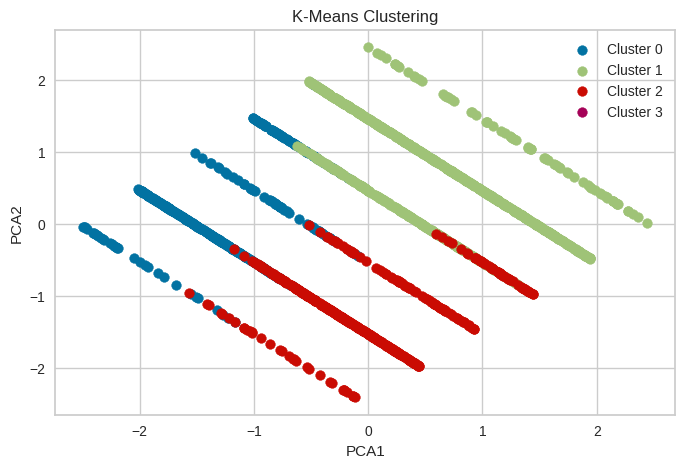

In [ ]:
from sklearn.decomposition import PCA
optimal_k = 4

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title("K-Means Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


There are four distinct clusters (labeled as Cluster 0, Cluster 1, Cluster 2, and Cluster 3), as determined by the
k=4 clustering.
The clusters appear to be well-separated in the PCA-reduced space. This indicates that the K-Means algorithm has successfully grouped similar data points into distinct clusters with minimal overlap in this lower-dimensional representation.

as we discussed in the silhouette score results and from the clustering visualisation plot above we can see that there is an overlapping. the solution might be adding more features or try other features combinations . Absolutely we tried both of this solutions but it results with a minimum silhouette score than the current features selected.

 including additional features may cause cluster boundaries to become less distinct because unrelated features dilute the meaningful patterns in the data. This leads to decreasing intra-cluster cohesion, clusters overlapping due to increased dimensionality.
 **By focusing on "AgeMonths" and "WeightKg", we are limiting the clustering to features that maximize separability, and provide Simpler model, better-defined clusters, and a Silhouette Score of 0.5, indicating moderate quality.**
 These features likely show a clear separation in the dataset, minimizing ambiguity between clusters.



---


**Analysing cluster characteristics :**


*   Cluster 0 might represent younger, smaller pets.
*   Cluster 1 might represent medium-sized pets at a particular stage of development.
*  Cluster 2 and Cluster 3 might group older or heavier pets.